<a href="https://colab.research.google.com/github/HyeonGilHwang/Modu_DL/blob/main/%EB%91%98%EC%A7%B8%EB%A7%88%EB%8B%B9_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98_%EB%8F%99%EC%9E%91_%EC%9B%90%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 가장 훌륭한 예측선 긋기: 선형 회귀

## 1 선형 회귀의 정의
- 독립적으로 변할 수 있는 값 x를 독립 변수라고 한다.
- 독립 변수에 따라 종속적으로 변하는 y를 종속 변수라고 한다.
- 선형 회귀란 독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 작업을 말한다.
- 하나의 x값만으로도 y값을 설명할 수 있을 때 이를 단순 선형 회귀(simple linear regression)라고 한다.
- x값이 여러 개 필요할 때는 다중 선형 회귀(multiple linear regression)라 한다.

## 2 가장 훌륭한 예측선이란?
- 선형 회귀를 공부하는 과정은 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.

$$y = ax +b$$

- 여기서 x값은 독립 변수이고 y값은 종속 변수이다.
- 직선을 훌륭하게 그으려면 기울기 a값과 절편 b값을 정확이 예측해야한다.
- 젛확한 a와 b의 값을 따라 움직이는 x값을 대입하면 예측인 y값을 구할 수 있다.

## 3 최소제곱법
- 최소 제곱법은 주어진 x의 값이 하나일 때 적용이 가능하다. 여러 개의 x가 주어지는 경우 경사하강법을 이용한다.
- 기울기 a를 구하는 방법은 다음과 같다.

$$a = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$$

- 절편 b를 구하는 식은 다음과 같다.

$$b=\bar{y} - a\bar{x}$$

## 4 코딩으로 확인하는 최소 제곱

In [ ]:
import numpy as np
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

In [ ]:
mx = np.mean(x)
my = np.mean(y)

In [ ]:
# 기울기 a의 분모
divisor = sum([(i-mx)**2 for i in x])

In [ ]:
# 기울기 a의 분자
def top(x, mx, y, my):
  d = 0 
  for i in range(len(x)):
    d += (x[i]-mx)*(y[i]-my)
  return d

divided = top(x, mx, y, my)

In [ ]:
a = divided / divisor

In [ ]:
b = my - (mx * a)

In [ ]:
print("기울기 a =", a)
print("y 절편 b =", b)

기울기 a = 2.3
y 절편 b = 79.0


## 5 평균 제곱 오차
- 선이 얼마나 잘 그려졌는지를 평가하는 오차 평가 알고리즘이 필요하다.
- 오차를 평가하는 방법 중 가장 많이 사용되는 평균 제곱 오차(mean square error, MSE)를 배운다.

## 6 잘못 그은 선 바로잡기
- 오차를 단순히 더해 버리면 합이 0이 될수도 있기 때문에 부호를 없애햐 한다.
- 따라서, 오차의 합을 구할 때는 각 오차의 값을 제곱한다.

$$\sum_{i}^{n}(y_{i}-\hat{y_{i}})^{2}$$

- 평균 제곱 오차(Mean Squared Error, MSE)는 오차의 합에서 n으로 나눈다.

$$\frac{1}{n}\sum(y_{i}-\hat{y_{i}})^{2}$$

- 따라서, 우리가 하는 작업은 '평균 제곱 오차'의 계산 결과가 가장 작은 선을 찾는 작업이라고 설명할 수 있다.
- 선형 회귀란 임의의 직선을 그어 이에 대한 평균 제곱 오차를 구하고, 이 값을 가장 작게 만들어 주는 a와 b를 찾아가는 작업이다.

## 7 코딩으로 확인하는 평균 제곱 오차

In [ ]:
# 임의로 정한 기울기 3, 절편을 76이라고 하자.
fake_a_b = [3, 76]

In [ ]:
data=[[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [ ]:
# 직선
def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

In [ ]:
# 평균 제곱 오차
def mse(y, y_hat):
  return ((y-y_hat)**2).mean()

In [ ]:

def mse_val(y, predict_result):
  return mse(np.array(y), np.array(predict_result))

In [ ]:
predict_result = []

for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제 점수=%.f, 예측 점수=%.f" %(x[i], y[i], predict(x[i])))

공부시간=2, 실제 점수=81, 예측 점수=82
공부시간=4, 실제 점수=93, 예측 점수=88
공부시간=6, 실제 점수=91, 예측 점수=94
공부시간=8, 실제 점수=97, 예측 점수=100


In [ ]:
# 최종 mse 
# a, b를 적절히 조절하면서 오차가 최소화되는 a, b를 구해야한다.
# x가 하나일 경우에는 최소제곱법으로 구한 a, b가 최소의 mse를 가진다.
print("mse 최종값: "+str(mse_val(predict_result, y)))

mse 최종값: 11.0


# 4장 오차 수정하기: 경사 하강법
- 오차를 비교하여 가장 작은 방향으로 이동시키는 방벙이 있다.
- 바로 미분 기울기를 이용하는 경사 하강법(gradient descent)이다.

## 1 경사 하강법의 개요
- $a_{1}$에서 미분을 구한다.
- 구해진 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 $a_{2}$를 구한다.
- 위에서 구한 미분 값이 0이 아니라면 위 과정을 반복한다.
- 경사 하강법은 이렇게 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법을 말한다.
- p76 그림 4-3 참고

## 2 학습률
- 기울기의 부호를 바꿔 이동실킬 때 적절한 거리를 찾지 못해 너무 멀리 이동시키면 a 값이 한 점으로 모이지 않고 위로 치솟아 버린다.
- 어느 만큼 이동시킬지 신중히 결정해야 하는데, 이때 이동 거리를 정해주는 것을 학습률이라고 한다.
- p76 그림 4-4 참고

## 3 코딩으로 확인하는 경사 하강법
- 우리가 궁금한 것은 a와 b라는 것을 주의하고 식 전체를 미분하는 것이 아니라 필요한 값을 중심으로 미분해야 한다.

$$MSE(a, b)=\frac{1}{n}\sum(y_{i}-(ax_{i}+b))^{2}$$

$$\frac{\partial}{\partial a}=\frac{2}{n}\sum(ax_{i}+b - y_{i})x_{i}$$

$$\frac{\partial}{\partial b}=\frac{2}{n}\sum(ax_{i}+b - y_{i})$$

In [ ]:
# 브로드캐스팅 연산을 위해 리스트형식을 array로 바꿈
x_data = np.array(x)
y_data = np.array(y)

In [ ]:
y_pred = a*x_data + b # 오차함수 부분
error = y_data - y_pred # 오차

# 평균 제곱 오차를 a로 미분
# -를 위식에서 끄집어냄
a_diff = -(2 / len(x_data)) *sum(x_data*(error))
# 평균 제곱 오차를 b로 미분
b_diff = -(2 / len(x_data)) * sum(error)

In [ ]:
# lr 학습률
lr = 0.03 

a = a - lr * a_diff
b = b - lr * b_diff

In [ ]:
# 몇 번 반복될지 설정
epochs = 2001

In [ ]:
# 경사 하강법 시작

# 위에서 a, b를 구해서 초기화 시켜줌
a = 0
b = 0

for i in range(epochs):

  y_pred = a*x_data + b
  error = y_data - y_pred

  a_diff = -(2 / len(x_data)) *sum(x_data*(error))
  b_diff = -(2 / len(x_data)) * sum(error)

  a = a - lr * a_diff
  b = b - lr * b_diff

  if i % 100 == 0:
    print("epch=%.f, 기울기 = %.04f, 절편 = %.04f" % (i, a, b))

epch=0, 기울기 = 27.8400, 절편 = 5.4300
epch=100, 기울기 = 7.0739, 절편 = 50.5117
epch=200, 기울기 = 4.0960, 절편 = 68.2822
epch=300, 기울기 = 2.9757, 절편 = 74.9678
epch=400, 기울기 = 2.5542, 절편 = 77.4830
epch=500, 기울기 = 2.3956, 절편 = 78.4293
epch=600, 기울기 = 2.3360, 절편 = 78.7853
epch=700, 기울기 = 2.3135, 절편 = 78.9192
epch=800, 기울기 = 2.3051, 절편 = 78.9696
epch=900, 기울기 = 2.3019, 절편 = 78.9886
epch=1000, 기울기 = 2.3007, 절편 = 78.9957
epch=1100, 기울기 = 2.3003, 절편 = 78.9984
epch=1200, 기울기 = 2.3001, 절편 = 78.9994
epch=1300, 기울기 = 2.3000, 절편 = 78.9998
epch=1400, 기울기 = 2.3000, 절편 = 78.9999
epch=1500, 기울기 = 2.3000, 절편 = 79.0000
epch=1600, 기울기 = 2.3000, 절편 = 79.0000
epch=1700, 기울기 = 2.3000, 절편 = 79.0000
epch=1800, 기울기 = 2.3000, 절편 = 79.0000
epch=1900, 기울기 = 2.3000, 절편 = 79.0000
epch=2000, 기울기 = 2.3000, 절편 = 79.0000


In [ ]:
import matplotlib.pyplot as plt

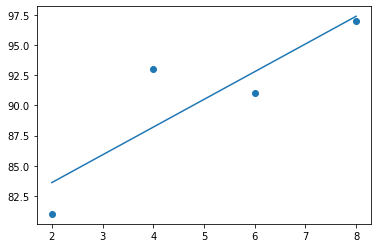

In [ ]:
# 시각화
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

## 4 다중 선형 회귀란
- 더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측 값을 구하려면 변수의 개수를 늘려 다중 선형 회귀를 만들어야 한다.

$$y = a_{1}x_{1} +a_{2}x_{2} +b$$

## 5 코딩으로 확인하는 다중 선형 회귀

In [ ]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for  i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

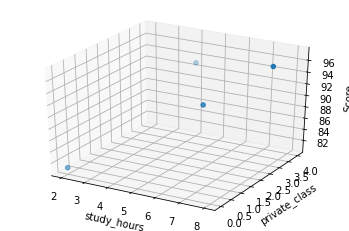

In [ ]:
# 위 데이터를 시각화해보자
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1, x2, y)
plt.show()

In [ ]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [ ]:
a1 = 0
a2 = 0
b = 0

In [ ]:
# 학습률 
lr = 0.02

# 반복수
epochs = 2401

# 경사하강법 시작
for i in range(epochs):
  y_pred = a1 * x1_data + a2 * x2_data +b # y를 구하는 식
  error = y_data - y_pred # 오차를 구하는 식

  a1_diff = -(2/len(x1_data)) * sum(x1_data*(error)) # 오차 함수를 a1으로 미분
  a2_diff = -(2/len(x2_data)) * sum(x2_data*(error)) # 오차 함수를 a2으로 미분
  b_diff = -(2/len(x1_data)) * sum(y_data - y_pred) # 오차 함수를 b로 미분

  a1 = a1 - lr*a1_diff
  a2 = a2 - lr*a2_diff
  b = b - lr*b_diff

  if i % 100 == 0:
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" %(i, a1, a2, b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.

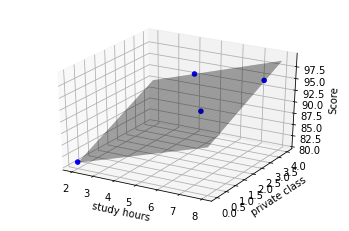

In [ ]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기
import pandas as pd
import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100), # linspace x,y를 100구간으로 나눠줘
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

# 5장 참 거짓 판단 장치: 로지스틱 회귀
- 참과 거짓 중에 하나를 내놓는 과정은 로지스틱 회귀(logistic regression)의 원리를 거쳐 이루어진다.

## 1 로지스틱 회귀의 정의
- 로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정이다. 다만 직선이 아니라, 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업이다.
- p90 그림5-2참고

## 2 시그모이드 함수
- 시그모이드 함수를 이용해 로지스틱 회귀를 풀어나가는 공식은 다음과 같다.



$$y=\frac{1}{1+e^{-(ax+b)}} $$


- a는 그래프의 경사를 결정하고 a 값이 커지면 경사가 커지고 a 값이 작아지면 경사가 작아진다.
- b는 그래프의 좌우 이동을 의미한다.
- p90 그림5-3, p91 그림5-4 참고

## 3 오차 공식
- 시그모이드 함수의 특징은 y 값이 0과 1사이라는 것이다.
- 따라서 실제 값이 1일 때 예측 값이 0에 가까워지면 오차는 커진다. 반대로, 실제 값이 0일 때 예측 값이 1에 가까워지는 경우도 오차가 커진다.
- 이를 공식으로 만들 수 있게 해 주는 함수가 로그 함수다.

## 4 로그 함수

$$-(y_{data} logh + (1-y_{data})log(1-h))$$

- 앞 부분을 A, 뒷 부분을 B라고 할때, 실제값 $y_{data}$라 할 때, 이 값이 1이면 B부분이 없어진다. 반대로 0이면 A부분이 없어진다.
- p93~94 참고

## 5 코딩으로 확인하는 로지스틱 회귀

In [8]:
import numpy as np

In [23]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data] # 공부한 시간 데이터
y_data = [i[1] for i in data] # 합격 여부

(-0.1, 1.1)

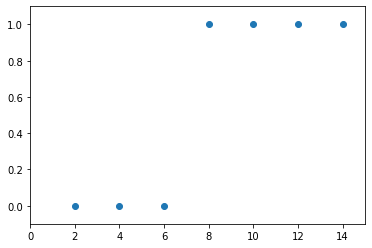

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-.1, 1.1)
# 공부 시간에 따른 합격 여부를 그래프로 나타낸 모습

In [26]:
a = 0
b = 0 

lr = 0.05 # 학습률

In [27]:
def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

- 로지스틱 회귀의 오차 함수는 다음과 같다.

$$-\frac{1}{n}\sum (ylogh +(1-y)log(1-h))$$

epoch=0, 기울기 = -0.0500, 절편 = -0.0250
epoch=0, 기울기 = -0.1388, 절편 = -0.0472
epoch=0, 기울기 = -0.2268, 절편 = -0.0619
epoch=0, 기울기 = 0.1201, 절편 = -0.0185
epoch=0, 기울기 = 0.2374, 절편 = -0.0068
epoch=0, 기울기 = 0.2705, 절편 = -0.0040
epoch=0, 기울기 = 0.2860, 절편 = -0.0029
epoch=1000, 기울기 = 1.4978, 절편 = -9.9401
epoch=1000, 기울기 = 1.4940, 절편 = -9.9411
epoch=1000, 기울기 = 1.4120, 절편 = -9.9547
epoch=1000, 기울기 = 1.4949, 절편 = -9.9444
epoch=1000, 기울기 = 1.4982, 절편 = -9.9440
epoch=1000, 기울기 = 1.4984, 절편 = -9.9440
epoch=1000, 기울기 = 1.4985, 절편 = -9.9440
epoch=2000, 기울기 = 1.9065, 절편 = -12.9489
epoch=2000, 기울기 = 1.9055, 절편 = -12.9491
epoch=2000, 기울기 = 1.8515, 절편 = -12.9581
epoch=2000, 기울기 = 1.9057, 절편 = -12.9514
epoch=2000, 기울기 = 1.9068, 절편 = -12.9513
epoch=2000, 기울기 = 1.9068, 절편 = -12.9513
epoch=2000, 기울기 = 1.9068, 절편 = -12.9513


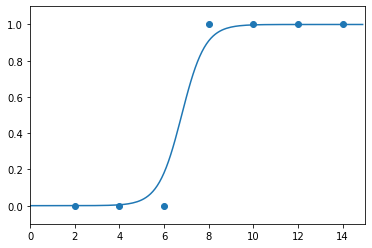

In [28]:
for i in range(2001):
  for x_data, y_data in data:
    # a에 관한 편미분
    a_diff = x_data*(sigmoid(a*x_data +b)- y_data)
    # b에 관한 편미분
    b_diff = sigmoid(a*x_data + b) - y_data

    a = a - lr *a_diff
    b = b - lr *b_diff

    if i % 1000 == 0:
      print("epoch=%.f, 기울기 = %.04f, 절편 = %.04f" % (i, a, b))

x_data = [i[0] for i in data] # 공부한 시간 데이터
y_data = [i[1] for i in data] # 합격 여부

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x +b) for x in x_range]))
plt.show()

- 만약 여기에 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면 소프트맥스(softmax)라는 함수를 쓴다.